<a href="https://colab.research.google.com/github/AgusDelga2/V2_Calsificacion/blob/main/V2_Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


# Introducción

En el siguiente proyecto se busca clasificar y predecir a pacientes con cancer de mama. El set de datos cuenta con 30 variables y una columna de target que contiene dos clasificaciones: o para los pacientes con tumor maligno, y 1 para pacientes con tumor maligno.

Los datos fueron obtenidos de las funciones de Sklearn.

# Import de librerías necesarias

In [7]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Tratamiento de datos

In [21]:
# Datos
# ==============================================================================

from sklearn.datasets import load_breast_cancer
datos = load_breast_cancer()
print("Keys: ",  datos.keys())
print("Features: ", datos.feature_names)

print("Description: ", datos.DESCR)


Keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Description:  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (me

In [74]:
df_y.describe()

,0
count,569.000000
mean,0.627417
std,0.483918
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [50]:
# Creamos el pandas df 
df_x = pd.DataFrame(datos['data'], columns = datos['feature_names'])
df_y = pd.DataFrame(datos.target)



## Analisis exploratorio de datos
Se debe tener en cuenta que el dataset tiene 30 dimensiones, por lo que no se pueden visualizar estos datapoints en el espacio de un gráfico, ni se podrá observar graficamente el límite de decisión.
 No obstante, la SVM aún pueden encontrar un límite de decisión. Sin embargo, en lugar de ser una línea de separación o un plano de separación, el límite de decisión se denomina hiperplano de separación.

In [36]:
df_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df_x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


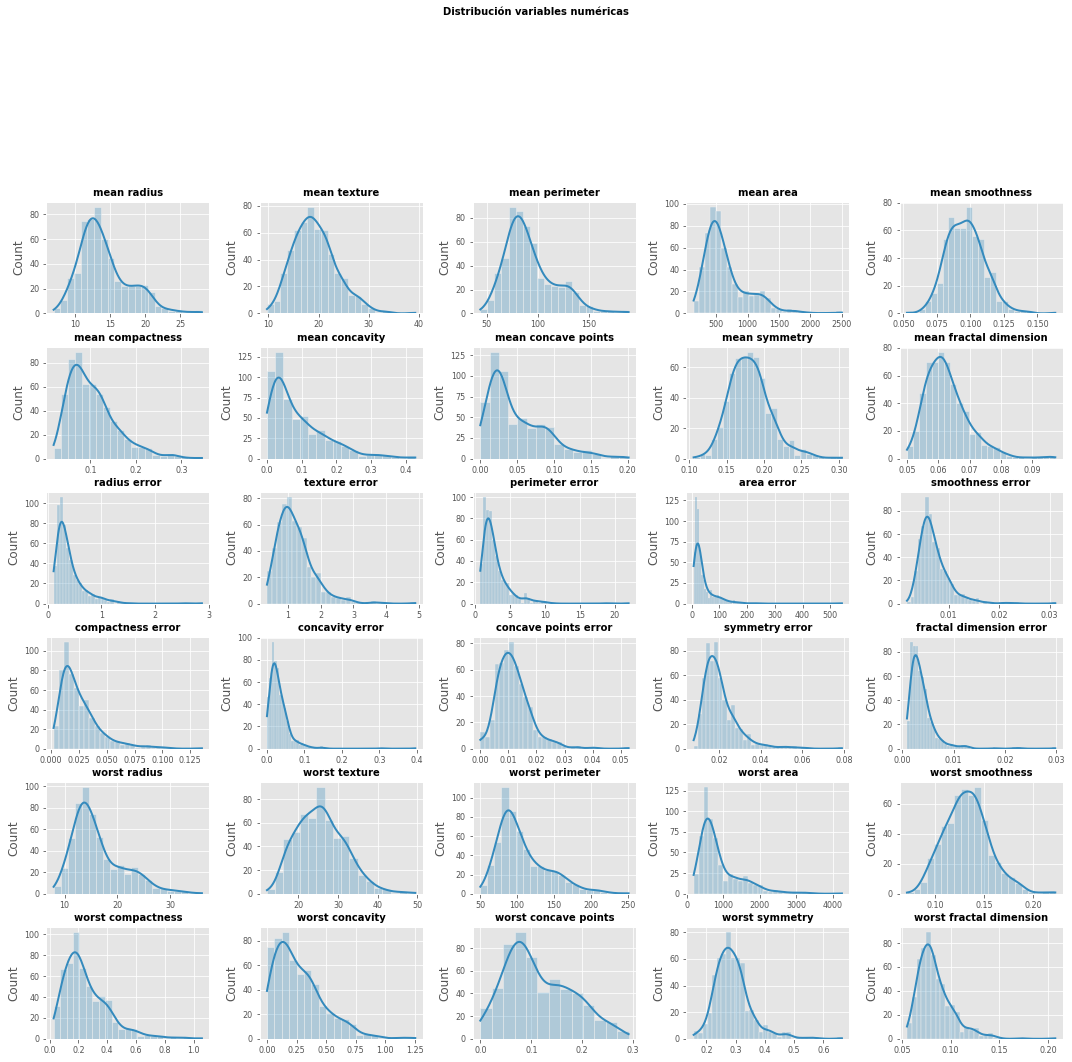

In [82]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))
axes = axes.flat
columnas_numeric = df_x.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df_x,
        x       = colum,
        stat    = "count",
        kde     = True,
        #color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.8)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

# Modelo SVM Radial

In [37]:
# División de los datos en train y test
# ==============================================================================
X = df_x
y = df_y

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [40]:
# Grid de hiperparámetros
# ==============================================================================
param_grid = {'C': np.logspace(-5, 7, 20)}

# Búsqueda por validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = SVC(kernel= "rbf", gamma='scale'),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = -1,
        cv         = 3, 
        verbose    = 0,
        return_train_score = True
      )

# Se asigna el resultado a _ para que no se imprima por pantalla
_ = grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_C,mean_test_score,std_test_score,mean_train_score,std_train_score
15,29763.514416,0.958217,0.008361,0.982416,0.004121
14,6951.927962,0.956010,0.011362,0.971422,0.004150
16,127427.49857,0.953846,0.005374,0.990103,0.005394
13,1623.776739,0.953831,0.009387,0.967026,0.005425
18,2335721.46909,0.949460,0.002958,0.994499,0.004116


In [41]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

modelo = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'C': 29763.51441631313} : 0.9582171488323458 accuracy


##Predicción y evaluación del modelo
Se evalúa la capacidad predictiva del modelo calculando el accuracy en el conjunto de test.

In [43]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)

In [44]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 93.85964912280701%


In [46]:
# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    predicciones,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,39,6
1,1,68


In [48]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predicciones))
print('\n')
print(confusion_matrix(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        45
           1       0.92      0.99      0.95        69

    accuracy                           0.94       114
   macro avg       0.95      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



[[39  6]
 [ 1 68]]


## Conclusión SVM Radial


Con un modelo SVM de kernel radial se consigue clasificar correctamente el %94 de las observaciones de test. GridSearch es una excelente herramienta que me ayudó a encontrar los mejores parámetos para utilizar en el modelo. 

Observamos que el F1 Score también tiene un valor alto, de %92. Podemos ver que en el recall llegamos al %87. Observando la matriz de confusión, vemos que son más los pacientes con cancer maligno (target = 0) que predice como pacientes con cancer benigno (target = 1), obteniendo más resultados falsos negativos (6) que flasos positivos (1). Por lo que en un caso de salud puede ser riesgoso. Es posible que esto se deba a que hay una mayor cantidad de datos de pacientes con tumor benigno.


In [78]:
benigno = df_y[0].sum()
maligno = 569 - benigno
print(f'En el dataset hay {benigno} pacientes con tumor benigno, y {maligno} pacientes con tumor maligno')

En el dataset hay 357 pacientes con tumor benigno, y 212 pacientes con tumor maligno


# Modelo de árbol de decisión para la clasificación


In [83]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [84]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 14


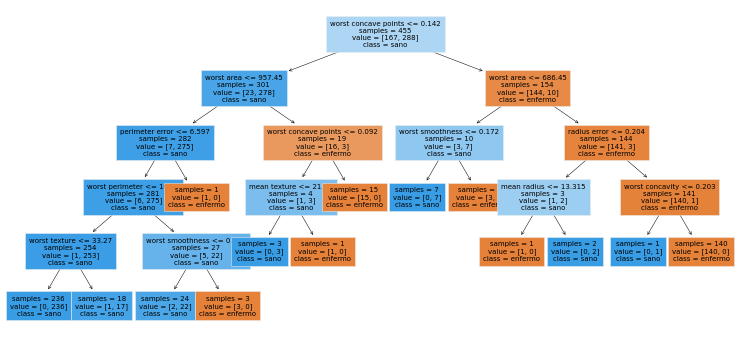

In [88]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = list(X_train.columns.values),
            class_names   = ['enfermo', 'sano'],
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )


#Predicción y evaluación del modelo

Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.



In [93]:
# Predicción
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test,)


In [94]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 91.22807017543859%


In [92]:
# Matriz de confusión
# ==============================================================================

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[37,  8],
       [ 2, 67]])

In [95]:
print(classification_report(y_test,predicciones))
print('\n')
print(confusion_matrix(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88        45
           1       0.89      0.97      0.93        69

    accuracy                           0.91       114
   macro avg       0.92      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114



[[37  8]
 [ 2 67]]


## Conclusión del árbol de decisión
Con un modelo de decision tree se consigue clasificar correctamente el %92 de las observaciones de test.

Observamos que el F1 Score también tiene un valor más bajo que el SVM, siendo %88 en este caso. Podemos ver que en el recall también bajó llegando a %82. Observando la matriz de confusión, vemos que vuelven a ser más los pacientes con cancer maligno que predice como pacientes con cancer benigno, obteniendo más resultados falsos negativos (8) que flasos positivos (2). 

Haremos el prunning del decision trees para prober si obtenemos mejores resultados utilizando GridSearch


# Nuevo modelo de decision tree con prunning
Aunque inicialmente se ha empleado un valor de max_depth=5, este no tiene por qué ser el mejor valor. Con el objetivo de identificar la profundidad óptima que consigue reducir la varianza y aumentar la capacidad predictiva del modelo, se somete al árbol a un proceso de pruning.

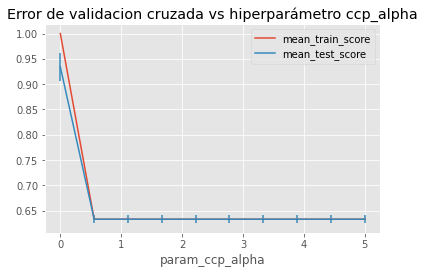

In [98]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [99]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

In [100]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 6
Número de nodos terminales: 15


In [102]:
# Predicción
#-------------------------------------------------------------------------------
predicciones = modelo_final.predict(X = X_test)

In [103]:
# Precisión
#-------------------------------------------------------------------------------
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")

El accuracy de test es: 89.47368421052632 %


In [104]:
# Matriz de confusión
# ==============================================================================

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)

Matriz de confusión
-------------------


array([[37,  8],
       [ 4, 65]])

## Conclusión decision tree con pruning

Lamentablemente, luego del proceso de pruning el porcentaje de las metricas han bajado. Podemos observar principalmente que la precisión ha pasado de %92 a %89,5.

# Conclusión final

Luego de utilizar los modelos de SVM Radial y decision tree, podemos concluír que el mejor modelo para clasificar y predecir el presente set de datos es el SVM. Sus métricas obtenidas fueron las mejores, con una precisión del %94 vs el %92 obtenido en le mejor decision tree. 

Debemos tener en cuenta lo mencionado anteriormente, que hay una mayor cantidad de registros de pacientes con tumor beningno que con tumor maligno. Lo que influye en el modelo y se puede ver observado en el recall.

## Bibliografía

Gran parte del código de este proyecto estuvo inspirado principalmente en los siguientes documentos:


* Máquinas de Vector Soporte (SVM) con Python by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py24-svm-python.html

* Árboles de decisión con Python: regresión y clasificación by Joaquín Amat Rodrigo, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/py07_arboles_decision_python.html